In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

plt.rc('font', family = 'Malgun Gothic')
pd.set_option('display.max_columns', None)
filterwarnings('ignore')

In [2]:
df_grade = pd.read_csv('./dataset/df_grade.csv')

tmp = sorted(df_grade.play.unique())

for id, date in enumerate(tmp):
    idx = df_grade.query(f'`play` == "{date}"').index
    df_grade.loc[idx,'performance_id'] = id
    

In [3]:
df_grade.performance_id = df_grade.performance_id.astype('int')
df_grade.drop('performance_code', axis = 1, inplace = True)


In [4]:
df_c = pd.read_csv('./dataset/performance_cluster_ver02.csv', index_col = 0)
df = pd.read_csv('./dataset/pivot_price_ver02.csv', index_col = 0)

In [5]:
df_c.reset_index()

,index,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster,genre
0,0,31,30,1757,0,5,4,10,14,14,10,4,120,15,29,4,9,19,100000,0,1818,2,0
1,1,40,21,2402,0,10,7,5,20,17,1,1,140,20,28,3,3,27,100000,0,2463,2,0
2,2,168,311,1441,2,38,49,98,122,101,48,21,120,15,215,25,75,164,100000,1,1920,0,1
3,3,0,0,3007,0,0,0,0,0,0,0,0,100,20,0,0,0,0,0,1,3007,4,2
4,4,0,0,2192,0,0,0,0,0,0,0,0,120,20,0,0,0,0,0,0,2192,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,706,858,1257,10,237,310,326,400,220,55,6,120,15,578,263,184,539,50000,0,2821,2,4
747,747,659,1418,38,27,243,297,444,544,352,119,51,120,20,421,395,246,1015,200000,1,2115,1,4
748,748,312,761,103,12,154,237,295,220,100,30,25,100,20,244,219,155,455,130000,1,1176,1,8
749,749,426,1549,1140,6,86,205,463,457,553,188,17,120,15,812,164,270,729,30000,0,3115,2,7


In [6]:
df_tojoin = df_c.reset_index()[['index', 'cluster']]
df_tojoin.columns = ['performance_id', 'cluster']
df_grade_cluster = pd.merge(df_grade, df_tojoin, on = 'performance_id', how = 'left')

In [7]:
# df_grade_cluster.to_csv('./dataset/df_grade_cluster.csv')

In [8]:
genres = dict(zip(range(df.genre.nunique()), df.genre.unique()))

for i in range(len(df_c)):
    df_c.loc[i,'genre'] = genres[df_c.loc[i, 'genre']]
    
df_c

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster,genre
0,31,30,1757,0,5,4,10,14,14,10,4,120,15,29,4,9,19,100000,0,1818,2,클래식
1,40,21,2402,0,10,7,5,20,17,1,1,140,20,28,3,3,27,100000,0,2463,2,클래식
2,168,311,1441,2,38,49,98,122,101,48,21,120,15,215,25,75,164,100000,1,1920,0,합창
3,0,0,3007,0,0,0,0,0,0,0,0,100,20,0,0,0,0,0,1,3007,4,콘서트
4,0,0,2192,0,0,0,0,0,0,0,0,120,20,0,0,0,0,0,0,2192,2,콘서트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,706,858,1257,10,237,310,326,400,220,55,6,120,15,578,263,184,539,50000,0,2821,2,교향곡
747,659,1418,38,27,243,297,444,544,352,119,51,120,20,421,395,246,1015,200000,1,2115,1,교향곡
748,312,761,103,12,154,237,295,220,100,30,25,100,20,244,219,155,455,130000,1,1176,1,독주
749,426,1549,1140,6,86,205,463,457,553,188,17,120,15,812,164,270,729,30000,0,3115,2,기타


In [9]:
# df_c.loc[:,'play_timezone'] = np.where(df_c.play_timezone == 0, '낮', '저녁')

In [10]:
df_c.groupby('cluster')['price'].mean()

cluster
0    122849.056604
1    121163.934426
2     86126.984127
3    129181.818182
4     44739.884393
5     75428.571429
6    346470.588235
Name: price, dtype: float64

In [11]:
df_c.groupby('cluster')['price'].count()

cluster
0    212
1     61
2    189
3     22
4    173
5     77
6     17
Name: price, dtype: int64

[]

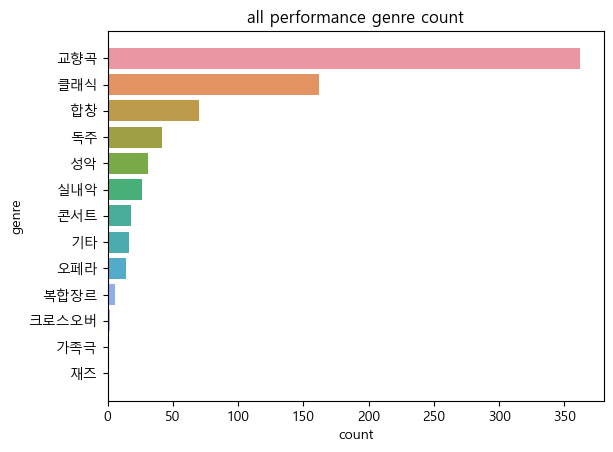

In [12]:
genre_all = df_c.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_all.columns = ['count']

sns.barplot(y = genre_all.index, x = 'count', data = genre_all)

plt.title('all performance genre count')
plt.plot()

[]

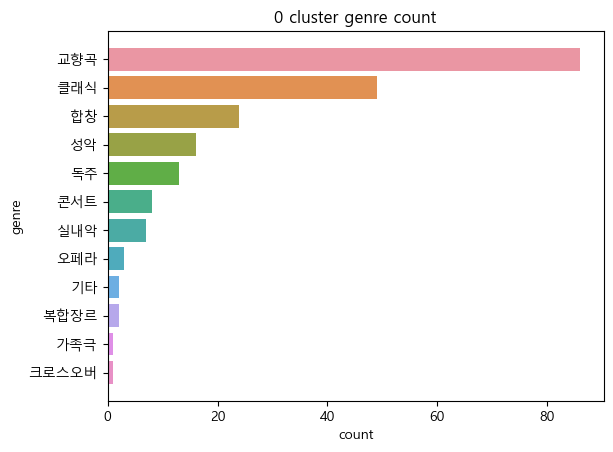

In [13]:
df_0 = df_c.query('`cluster` == 0')

genre_0 = df_0.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_0.columns = ['count']
genre_0

sns.barplot(y = genre_0.index, x = 'count', data = genre_0)

plt.title('0 cluster genre count')
plt.plot()

In [14]:
df_0.drop('genre', inplace = True, axis = 1)

df_0.loc['평균', :] = df_0.loc[:,:].mean(axis= 0)

df_0.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,154.509434,299.882075,909.419811,3.471698,60.514151,85.792453,107.193396,103.778302,70.971698,18.679245,3.990566,113.009434,15.966981,153.377358,68.103774,59.146226,173.764151,122849.056604,1.0,1363.811321,0.0


[]

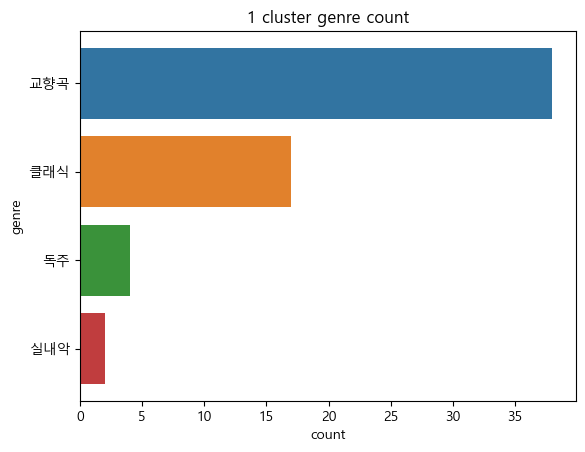

In [15]:
df_1 = df_c.query('`cluster` == 1')

genre_1 = df_1.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_1.columns = ['count']

sns.barplot(y = genre_1.index, x = 'count', data = genre_1)

plt.title('1 cluster genre count')
plt.plot()

In [16]:
df_1.drop('genre', inplace = True, axis = 1)

df_1.loc['평균', :] = df_1.loc[:,:].mean(axis= 0)

df_1.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,474.262295,815.819672,339.770492,8.42623,137.311475,212.180328,306.721311,307.885246,213.262295,63.360656,40.934426,111.491803,15.737705,330.459016,199.557377,174.032787,586.032787,121163.934426,0.688525,1629.852459,1.0


[]

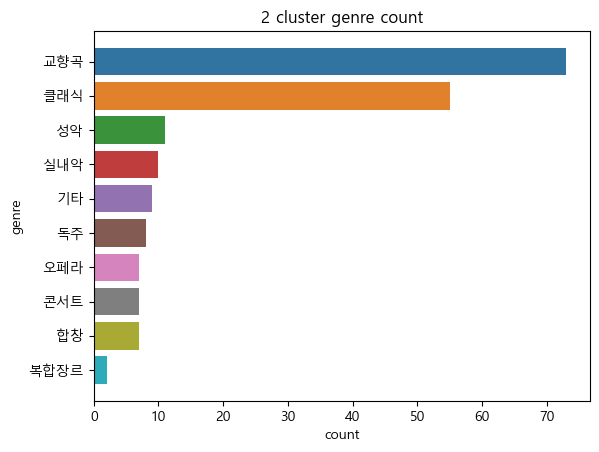

In [17]:
df_2 = df_c.query('`cluster` == 2')

genre_2 = df_2.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_2.columns = ['count']

sns.barplot(y = genre_2.index, x = 'count', data = genre_2)

plt.title('2 cluster genre count')
plt.plot()

In [18]:
df_2.drop('genre', inplace = True, axis = 1)

df_2.loc['평균', :] = df_2.loc[:,:].mean(axis= 0)

df_2.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,201.78836,394.746032,813.26455,4.677249,74.031746,104.783069,140.042328,142.0,97.470899,28.449735,5.079365,113.835979,16.243386,217.84127,85.502646,77.380952,215.809524,86126.984127,0.0,1409.798942,2.0


[]

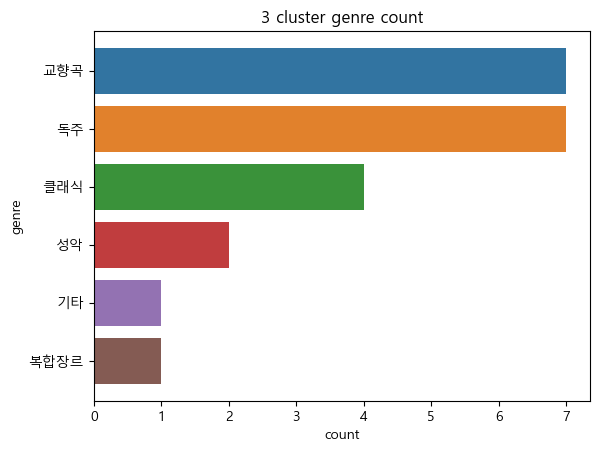

In [19]:
df_3 = df_c.query('`cluster` == 3')

genre_3 = df_3.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_3.columns = ['count']

sns.barplot(y = genre_3.index, x = 'count', data = genre_3)

plt.title('3 cluster genre count')
plt.plot()

In [20]:
df_3.drop('genre', inplace = True, axis = 1)

df_3.loc['평균', :] = df_3.loc[:,:].mean(axis= 0)

df_3.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,422.409091,1627.045455,511.136364,25.136364,217.818182,406.772727,622.954545,505.681818,211.909091,51.272727,7.909091,114.090909,14.545455,316.545455,797.318182,275.681818,659.909091,129181.818182,0.363636,2560.590909,3.0


[]

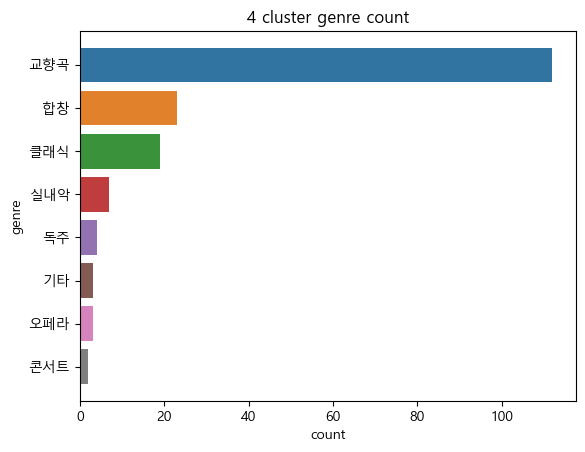

In [21]:
df_4 = df_c.query('`cluster` == 4')

genre_4 = df_4.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_4.columns = ['count']

sns.barplot(y = genre_4.index, x = 'count', data = genre_4)

plt.title('4 cluster genre count')
plt.plot()

In [22]:
df_4.drop('genre', inplace = True, axis = 1)

df_4.loc['평균', :] = df_4.loc[:,:].mean(axis= 0)

df_4.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,168.635838,214.479769,952.890173,2.531792,55.132948,60.32948,72.283237,94.040462,74.710983,21.040462,3.046243,108.260116,16.069364,138.33526,44.445087,44.982659,155.352601,44739.884393,1.0,1336.00578,4.0


[]

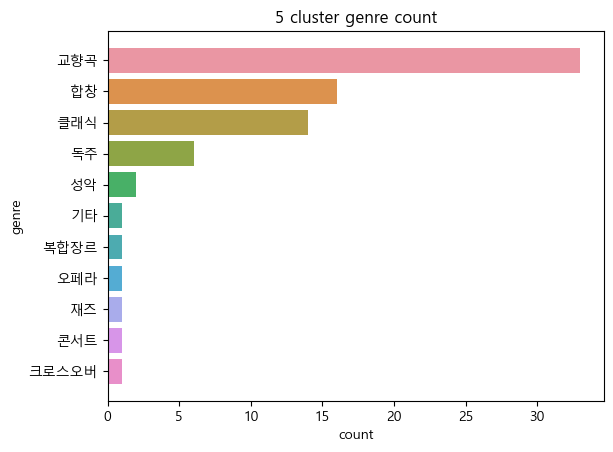

In [23]:
df_5 = df_c.query('`cluster` == 5')

genre_5 = df_5.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_5.columns = ['count']

sns.barplot(y = genre_5.index, x = 'count', data = genre_5)

plt.title('5 cluster genre count')
plt.plot()

In [24]:
df_5.drop('genre', inplace = True, axis = 1)

df_5.loc['평균', :] = df_5.loc[:,:].mean(axis= 0)

df_5.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,239.857143,397.675325,778.844156,5.987013,80.909091,113.753247,151.38961,155.207792,96.480519,26.675325,7.12987,93.896104,0.0,215.649351,104.480519,75.961039,241.441558,75428.571429,0.662338,1416.376623,5.0


[]

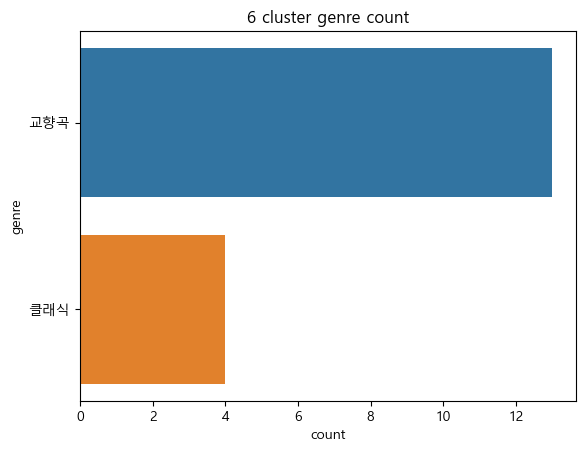

In [25]:
df_6 = df_c.query('`cluster` == 6')

genre_6 = df_6.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_6.columns = ['count']

sns.barplot(y = genre_6.index, x = 'count', data = genre_6)

plt.title('6 cluster genre count')
plt.plot()

In [26]:
df_6.drop('genre', inplace = True, axis = 1)

df_6.loc['평균', :] = df_6.loc[:,:].mean(axis= 0)

df_6.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,734.529412,1414.352941,517.941176,11.0,195.529412,391.117647,520.117647,504.588235,366.823529,114.529412,45.176471,113.529412,14.705882,365.588235,399.647059,328.588235,1055.058824,346470.588235,0.823529,2666.823529,6.0


In [27]:
mean_0 = df_0.tail(1).T
mean_1 = df_1.tail(1).T
mean_2 = df_2.tail(1).T
mean_3 = df_3.tail(1).T
mean_4 = df_4.tail(1).T
mean_5 = df_5.tail(1).T
mean_6 = df_6.tail(1).T

mean_0.columns = ['mean_0']
mean_1.columns = ['mean_1']
mean_2.columns = ['mean_2']
mean_3.columns = ['mean_3']
mean_4.columns = ['mean_4']
mean_5.columns = ['mean_5']
mean_6.columns = ['mean_6']

In [28]:
cluster_mean = pd.DataFrame(index = mean_0.index, data = {'mean_0' : mean_0.mean_0.values,
                                           'mean_1' : mean_1.mean_1.values,
                                           'mean_2' : mean_2.mean_2.values,
                                           'mean_3' : mean_3.mean_3.values,
                                           'mean_4' : mean_4.mean_4.values,
                                           'mean_5' : mean_5.mean_5.values,
                                           'mean_6' : mean_6.mean_6.values})

In [29]:
cmp = cluster_mean

cmp

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6
gender_m,154.509434,474.262295,201.788360,422.409091,168.635838,239.857143,734.529412
gender_f,299.882075,815.819672,394.746032,1627.045455,214.479769,397.675325,1414.352941
member_n,909.419811,339.770492,813.264550,511.136364,952.890173,778.844156,517.941176
age_10,3.471698,8.426230,4.677249,25.136364,2.531792,5.987013,11.000000
age_20,60.514151,137.311475,74.031746,217.818182,55.132948,80.909091,195.529412
age_30,85.792453,212.180328,104.783069,406.772727,60.329480,113.753247,391.117647
age_40,107.193396,306.721311,140.042328,622.954545,72.283237,151.389610,520.117647
age_50,103.778302,307.885246,142.000000,505.681818,94.040462,155.207792,504.588235
age_60,70.971698,213.262295,97.470899,211.909091,74.710983,96.480519,366.823529
age_70,18.679245,63.360656,28.449735,51.272727,21.040462,26.675325,114.529412


In [30]:
cluster_mean.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'] 

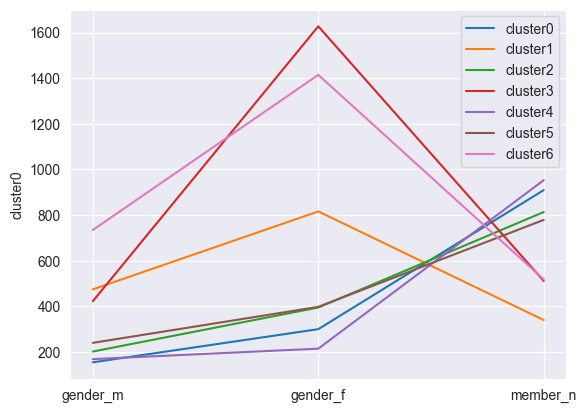

In [31]:
sns.set_style('darkgrid')
cmp = cluster_mean.loc[['gender_m', 'gender_f', 'member_n'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

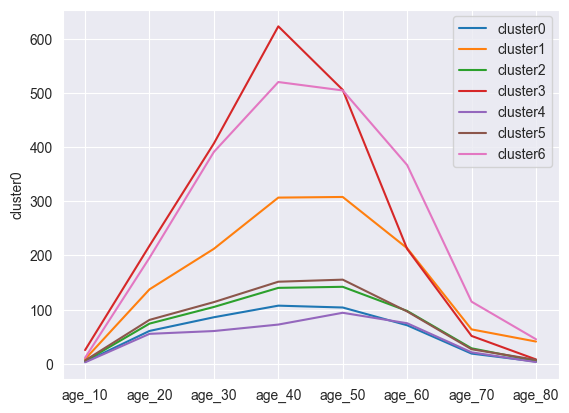

In [32]:
cmp = cluster_mean.loc[['age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

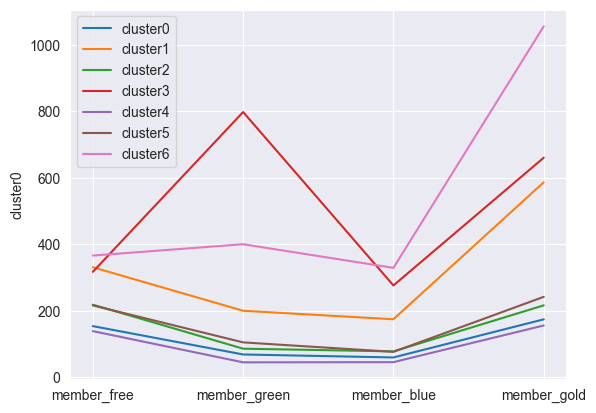

In [33]:
cmp = cluster_mean.loc[['member_free', 'member_green', 'member_blue', 'member_gold'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

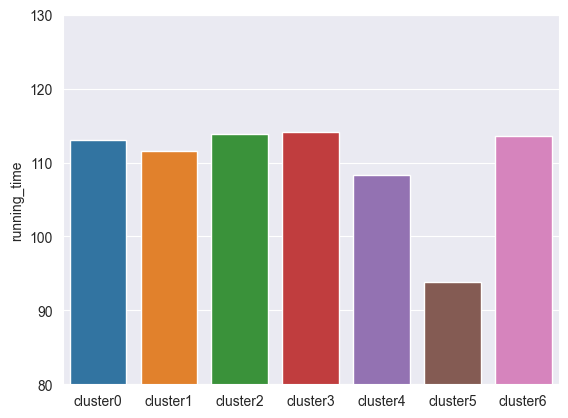

In [42]:
cmp = cluster_mean.loc[['running_time'],:].T
sns.barplot(data=cmp, x=cmp.index, y='running_time', label='running_time')
plt.ylim([80, 130])
plt.show()

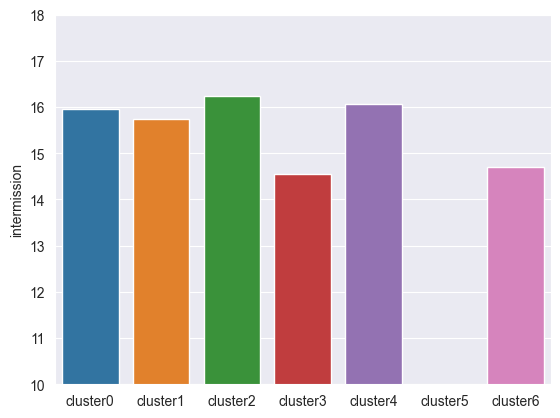

In [44]:
cmp = cluster_mean.loc[['intermission'],:].T
sns.barplot(data=cmp, x=cmp.index, y='intermission', label='intermission')
plt.ylim([10, 18])
plt.show()

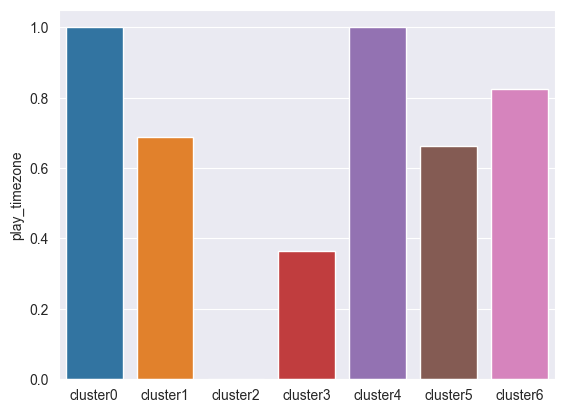

In [45]:
cmp = cluster_mean.loc[['play_timezone'],:].T
sns.barplot(data=cmp, x=cmp.index, y='play_timezone', label='play_timezone')
plt.show()

In [48]:
cmp

,total_member
cluster0,1363.811321
cluster1,1629.852459
cluster2,1409.798942
cluster3,2560.590909
cluster4,1336.005780
cluster5,1416.376623
cluster6,2666.823529


In [59]:
cmp2 = df_c.groupby('cluster')[['price']].count().reset_index()
cmp2.columns = ['cluster', 'perform_counts']
cmp2.cluster = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']

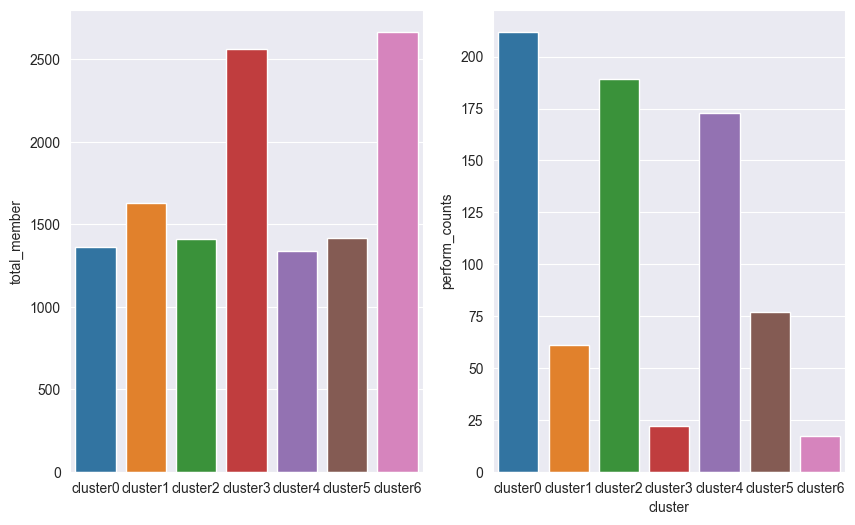

In [61]:

fig, ax = plt.subplots(1, 2, figsize = (10, 6))

cmp = cluster_mean.loc[['total_member'],:].T

sns.barplot(data=cmp, x=cmp.index, y='total_member', label='total_member', ax = ax[0])
sns.barplot(data =cmp2, x = 'cluster', y = 'perform_counts', ax = ax[1])
plt.show()

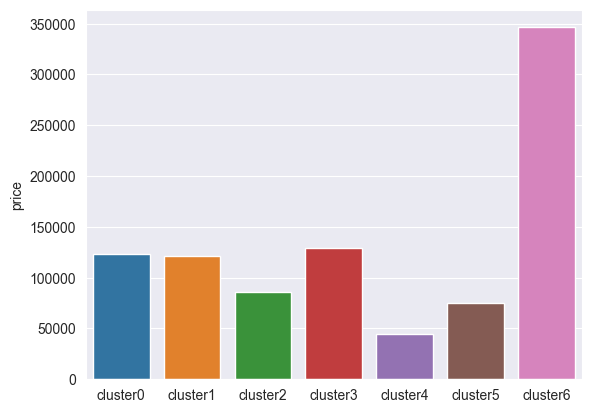

In [63]:
cmp = cluster_mean.loc[['price'],:].T
sns.barplot(data=cmp, x=cmp.index, y='price', label='price')
plt.show()